In [3]:
# Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from PIL import Image
import keras
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn import svm
from tqdm.notebook import tqdm
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
import cv2


## Loading data from data folder and storing image path and labels detail to a separate list

In [4]:
test_dir = 'C:\\Users\\JoyBoy\\Desktop\\Code\\Projects\\data\\data_1\\test'
train_dir = 'C:\\Users\\JoyBoy\\Desktop\\Code\\Projects\\data\\data_1\\train'

In [5]:
import os
def load_data(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                image_path = os.path.join(label_dir, filename)
                image_paths.append(image_path)
                labels.append(label)
                
            print(label, "Done!")

    return image_paths, labels


## Creating DataFrame

In [6]:
train = pd.DataFrame()
train['image'] , train['label'] = load_data(train_dir)

## Shuffling the dataset
train = train.sample(frac =1).reset_index(drop=True) # To shuffle the data for randomly distributing data into dataset
train.head()

angry Done!
disgusted Done!
fearful Done!
happy Done!
neutral Done!
sad Done!
surprised Done!


,image,label
0,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,angry
1,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,happy
2,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,neutral
3,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,fearful
4,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,happy


In [7]:
test = pd.DataFrame()
test['image'] , test['label'] = load_data(test_dir)
test.head()

angry Done!
disgusted Done!
fearful Done!
happy Done!
neutral Done!
sad Done!
surprised Done!


,image,label
0,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,angry
1,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,angry
2,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,angry
3,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,angry
4,C:\Users\JoyBoy\Desktop\Code\Projects\data\dat...,angry


## Exploratory Data Analysis (EDA)

In [10]:
def EDA(name):
    sns.countplot(data = name , x='label') #Plotting label column of train

    plt.xlabel('Categories - Emotions')
    plt.ylabel('Count')
    plt.title('Count Plot of Emotions Categories')

    plt.show()  

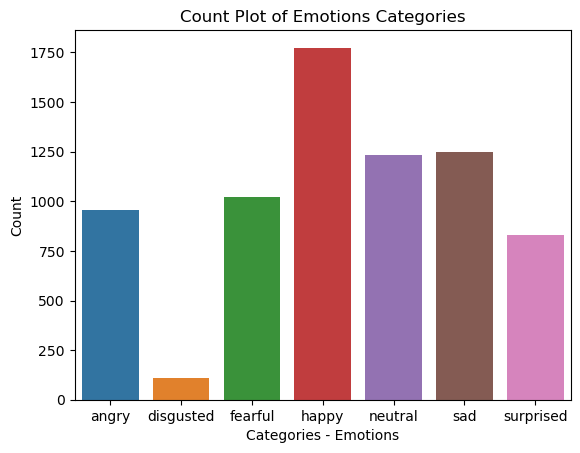

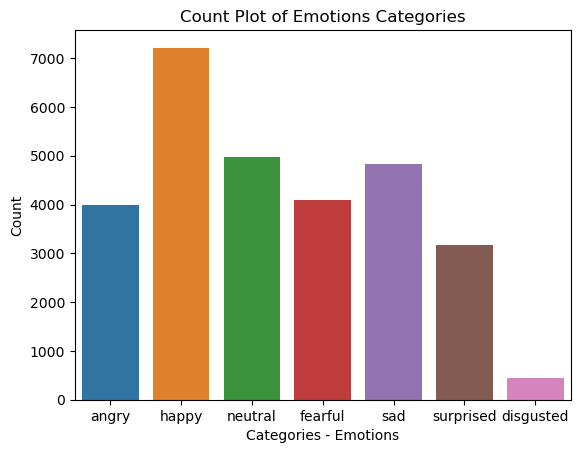

In [9]:
EDA(test)
EDA(train)

## IMAGE WORK

In [15]:
# # Open an image file
# img = Image.open(train['image'][1])
# plt.imshow(img , cmap='gray');

## make an np array

In [16]:
# ## grid of image
# from PIL import Image

# plt.figure(figsize =(25,25))
# files = train.iloc[:10]

# for index , file , label in files.itertuples():
#     plt.subplot(5,5,index+1)
#     img = load_img(file)
#     img = np.array(img)
#     plt.imshow(img)
#     plt.axis('off')
#     plt.title(label)

In [20]:
 def extract_feature(images):
        feature = []
        for image in tqdm(images):
            img = load_img(image , color_mode = "grayscale")
            img = np.array(img)
            feature.append(img)
        feature = np.array(feature)
        feature = feature.reshape(len(feature),48,48,1)
        return feature

   

In [21]:
train_feature = extract_feature(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [22]:
test_feature = extract_feature(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [23]:
x_train = train_feature/255.0
x_test = test_feature/255.0

In [24]:
# def encoder(label):
#     # Sample labels
#     labels = ['angry', 'sad', 'fearful', 'happy', 'disgusted','surprise','neutral']

#     # Initialize the label encoder
#     label_encoder = LabelEncoder()

#     # Fit and transform the labels to integer values
#     integer_labels = label_encoder.fit_transform(labels)

#     # Print the mapping between labels and integers
#     print("Label to Integer Mapping:")
#     for label, integer_label in zip(labels, integer_labels):
#         print(f"{label} -> {integer_label}")


In [25]:
# encoder(train['label'])

In [26]:
# lab = LabelEncoder()
# lab.fit(train['label'])

In [27]:
# y_train = lab.transform(train['label'])
# y_test = lab.transform(test['label'])

In [28]:
# print(y_train)
# print(y_test)

# # Reshape x_train if needed (e.g., flattening for images)
# x_train = x_train.reshape(x_train.shape[0], -1)

# # Ensure y_train is a 1D array
# y_train = y_train.ravel()

In [29]:
lab = LabelEncoder()
lab.fit(train['label'])

LabelEncoder()

In [30]:
y_train = lab.transform(train['label'])
y_test = lab.transform(test['label'])

In [31]:
y_train = to_categorical(y_train , num_classes=7)
y_test = to_categorical(y_test , num_classes=7)

## MODEL